1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

BS = '\033[1m'
BE = '\033[0m'

In [20]:
import numpy.random as npr
npr.seed(123)

n = 1000

x1 = np.random.normal(0,1,(1,n))
x2 = x1 + np.random.normal(0,3,(1,n))
x3 = 2*x1+x2
print('x1 shape:', x1.shape)
print('x2 shape:', x2.shape)
print('x3 shape:', x3.shape)

X = np.concatenate((x1,x2,x3), axis = 0)
print('X  shape:', X.shape)

cov = np.cov(X)
print("\nCovariance matrix:\n", cov)

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix

l, V = la.eig(cov)
l = np.real_if_close(l)

print(BS, "\nEIGENDECOMPOSITION:", BE)

print("Eigenvalues:\n", l)
print("Eigenvectors:\n", V)

#Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result

U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(n-1) 
V_svd = U

print(BS, "\nSVD:", BE)

print("Eigenvalues:\n", l_svd)
print("Eigenvectors:\n", V_svd)


#the two procedures yield to same result

print(BS,"\nThe two procedures yield to the same result?", BE,
      np.allclose(np.sort(l), np.sort(l_svd), atol=1e-2) and np.allclose(np.sort(V), np.sort(V_svd), atol=1e-2))




x1 shape: (1, 1000)
x2 shape: (1, 1000)
x3 shape: (1, 1000)
X  shape: (3, 1000)

Covariance matrix:
 [[ 1.00257827  0.9125078   2.91766434]
 [ 0.9125078   9.0907464  10.91576199]
 [ 2.91766434 10.91576199 16.75109067]]
 
EIGENDECOMPOSITION: 
Eigenvalues:
 [2.48444042e+01 4.58947046e-17 2.00001118e+00]
Eigenvectors:
 [[-0.12126076 -0.81649658  0.56447246]
 [-0.57007399 -0.40824829 -0.71298596]
 [-0.81259551  0.40824829  0.41595897]]
 
SVD: 
Eigenvalues:
 [2.48523345e+01 2.00261090e+00 7.30060403e-32]
Eigenvectors:
 [[-0.12137294  0.56444835 -0.81649658]
 [-0.56993229 -0.71309924 -0.40824829]
 [-0.81267816  0.41579747  0.40824829]]
 
The two procedures yield to the same result?  True


In [21]:
l_sum = l.sum()

print("By selecting the component 0, we retain %.2f%% of the total variability" % ((l[0]/l_sum)*100))
print("By selecting the component 1, we retain %.17f%% of the total variability" % ((l[1]/l_sum)*100))
print("By selecting the component 2, we retain %.2f%% of the total variability" % ((l[2]/l_sum)*100))

#This makes sense beacuse x2 depends from x1, and x3 is simply the sum of x1 and x2
#as a consequence the variability of the entire set is almost contained in a single component

print("\nTherefore to reduce the dimensionality of the system while retaining at least 99% of the total variability:",
      BS,"\nWe select the components 0 and 2.", BE)

X_reduced = X[::2,:]

#Redefine the data according to the new basis from the PCA
Xp = np.dot(V.T, X)


By selecting the component 0, we retain 92.55% of the total variability
By selecting the component 1, we retain 0.00000000000000017% of the total variability
By selecting the component 2, we retain 7.45% of the total variability

Therefore to reduce the dimensionality of the system while retaining at least 99% of the total variability:  
We select the components 0 and 2. 


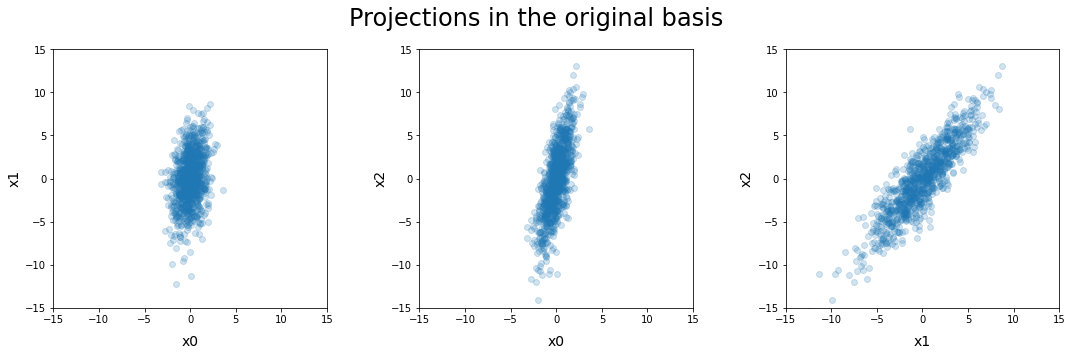

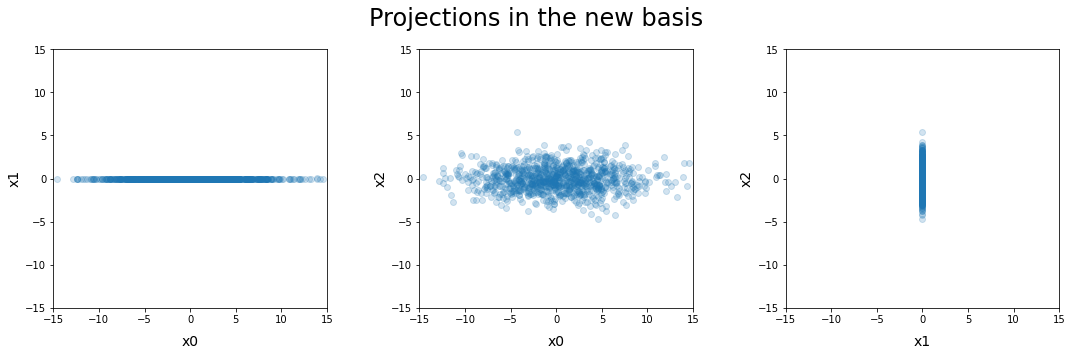

In [22]:
#PLOT THE ORGINAL BASIS
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.suptitle('Projections in the original basis', fontsize = 24)

#plot x0 and x1
ax1.scatter(X[0,:], X[1,:], alpha=0.2)
ax1.set_xlabel('x0', fontsize = 14, labelpad=10)
ax1.set_ylabel('x1', fontsize = 14)
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)

#plot x0 and x2
ax2.scatter(X[0,:], X[2,:], alpha=0.2)
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_xlabel('x0', fontsize = 14, labelpad=10)
ax2.set_ylabel('x2', fontsize = 14)

#plot x1 and x2
ax3.scatter(X[1,:], X[2,:], alpha=0.2)
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.set_xlabel('x1', fontsize = 14, labelpad=10)
ax3.set_ylabel('x2', fontsize = 14)

fig.tight_layout(w_pad=4)



#PLOT THE NEW BASIS
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
fig.suptitle('Projections in the new basis', fontsize = 24)

#plot x0 and x1
ax1.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax1.set_xlim(-15,15)
ax1.set_ylim(-15,15)
ax1.set_xlabel('x0', fontsize = 14, labelpad=10)
ax1.set_ylabel('x1', fontsize = 14)

#plot x0 and x2
ax2.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax2.set_xlim(-15,15)
ax2.set_ylim(-15,15)
ax2.set_xlabel('x0', fontsize = 14, labelpad=10)
ax2.set_ylabel('x2', fontsize = 14)

#plot x1 and x2
ax3.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax3.set_xlim(-15,15)
ax3.set_ylim(-15,15)
ax3.set_xlabel('x1', fontsize = 14, labelpad=10)
ax3.set_ylabel('x2', fontsize = 14)

fig.tight_layout(w_pad=4)


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [26]:
npr.seed(123)

#Adding uncorrelated random noise

data = X
for i in range(10):
    x = np.random.normal(0,npr.uniform(1,3)/20,(1,n))
    data = np.concatenate((data,x), axis = 0)
    #print(data.shape)
    

#Perform PCA using SVD

U, S, Vt = np.linalg.svd(data)
ln_svd = S**2/(n-1) 
Vn_svd = U

ln_sum = ln_svd.sum()

print(BS, "\nSVD:", BE)

i = 0
for i in range(data.shape[0]):
    print("By selecting the component %d, we retain %.2f%% of the total variability" % (i,((ln_svd[i]/ln_sum)*100)))
     
#The variability in the two dataset is very similar: in both cases, retaining only two varibales, it is higher than 99%

print(BS,"\nBy selecting the component 0 and 1, we retain %.2f%% of the total variability" 
      % ((ln_svd[0]+ln_svd[1])/ln_sum*100),BE)

print("The variability in the two datasets is very similar: in both cases, retaining only two varibales, it is higher than 99%\n")





 
SVD: 
By selecting the component 0, we retain 92.25% of the total variability
By selecting the component 1, we retain 7.43% of the total variability
By selecting the component 2, we retain 0.07% of the total variability
By selecting the component 3, we retain 0.05% of the total variability
By selecting the component 4, we retain 0.04% of the total variability
By selecting the component 5, we retain 0.04% of the total variability
By selecting the component 6, we retain 0.04% of the total variability
By selecting the component 7, we retain 0.02% of the total variability
By selecting the component 8, we retain 0.02% of the total variability
By selecting the component 9, we retain 0.01% of the total variability
By selecting the component 10, we retain 0.01% of the total variability
By selecting the component 11, we retain 0.01% of the total variability
By selecting the component 12, we retain 0.00% of the total variability
 
By selecting the component 0 and 1, we retain 99.68% of the tot

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [6]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [17]:
import pandas as pd

file_name = "data/magic04.data"
n = 0

magic = pd.read_csv("data/magic04.data", header=None)
magic = magic.drop(columns=[10])
display(magic)
            

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [10]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(magic)

l_svd = S**2/(n-1) 
V_svd = U

print(BS, "\nSVD:", BE)

print("\nEigenvalues:\n", l_svd)
print("\nEigenvectors:\n", V_svd)



 
SVD: 

Eigenvalues:
 [-9.07984944e+08 -7.98524370e+07 -3.96456019e+07 -2.54590815e+07
 -1.56229664e+07 -8.24791214e+06 -2.23211211e+06 -1.07288186e+04
 -6.62914518e+02 -8.03812118e+00]

Eigenvectors:
 [[-3.03239936e-03 -3.58932705e-03  8.45817849e-04 ... -8.20996315e-03
  -1.28599398e-02 -1.97295965e-02]
 [-6.80776740e-03 -4.93168598e-03  8.93506042e-04 ...  1.12988341e-02
   1.79290324e-02 -1.18726695e-02]
 [-1.00144095e-02 -3.78153851e-03  2.13679760e-02 ... -3.87890932e-04
  -8.99605080e-03 -1.28865116e-02]
 ...
 [-9.10740061e-03 -1.62275473e-03 -3.51827734e-03 ...  9.99671590e-01
  -4.27057217e-04  1.39714689e-04]
 [-1.43559247e-02  4.78057046e-03  1.80811955e-02 ... -4.37283224e-04
   9.97991209e-01 -7.82847471e-05]
 [-1.06045893e-02  2.77433781e-02  1.12912403e-02 ...  1.37450466e-04
  -9.91712402e-05  9.98563967e-01]]


In [11]:
#Perform PCA

l_sum = l_svd.sum()

i = 0
for i in range(magic.shape[1]):
    print("By selecting the component %d, we retain %.2f%% of the total variability" % (i,((l_svd[i]/l_sum)*100)))


By selecting the component 0, we retain 84.15% of the total variability
By selecting the component 1, we retain 7.40% of the total variability
By selecting the component 2, we retain 3.67% of the total variability
By selecting the component 3, we retain 2.36% of the total variability
By selecting the component 4, we retain 1.45% of the total variability
By selecting the component 5, we retain 0.76% of the total variability
By selecting the component 6, we retain 0.21% of the total variability
By selecting the component 7, we retain 0.00% of the total variability
By selecting the component 8, we retain 0.00% of the total variability
By selecting the component 9, we retain 0.00% of the total variability
